
# CHRIST (Deemed to be University)
## Department of Computer Science


## 5MCA-A - Neural Networks and Deep Learning (MCA572)


---
  
### Regular Lab Questions - Lab 3

*CIFAR-10 Neural Network with Backpropagation*

---

**Muskan Kumari Gupta [2347130]**

*27 Sept 2024*

#### Step 1: Data Preprocessing

170498071/170498071 [==============================] - 2s 0us/step


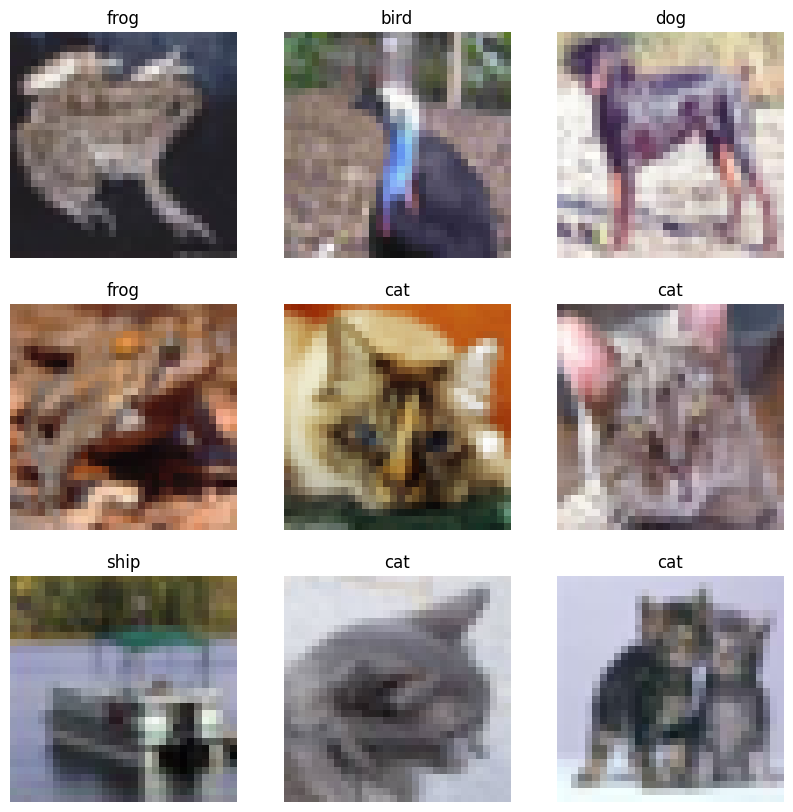

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the pixel values to the range between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Visualize a few CIFAR-10 images with their labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample_images(X, y, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(X[i])
        plt.title(class_names[y[i].argmax()])
        plt.axis('off')
    plt.show()

plot_sample_images(X_train, y_train, class_names)


Explanation:
Normalization: We normalize the pixel values to the range of 0 to 1 to improve the performance of the model by ensuring that all input features have the same scale.
One-Hot Encoding: Since CIFAR-10 is a multi-class classification problem, we convert the class labels into a one-hot encoded format, which is suitable for categorical cross-entropy loss.
Train-Test Split: We create a validation set from the training data to monitor overfitting during training.
Visualization: We plot a few sample images from the dataset with their corresponding labels.
Interpretation:
The images displayed show the CIFAR-10 dataset's diversity. This is critical for ensuring the network learns to distinguish between different objects effectively.

### Step 2: Network Architecture Design

In [ ]:
import tensorflow

In [ ]:
# Build the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential()

# Input layer (flattening the 32x32x3 images into 1D array)
model.add(Flatten(input_shape=(32, 32, 3)))

# Hidden layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer (10 classes with softmax activation)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1707274 (6.51 MB)
Trainable params: 170727

Explanation:
- Flattening: The input layer flattens the 32x32x3 images into a single 1D array so that it can be fed into the fully connected layers.
- Dense Layers: We use two hidden dense layers, each with ReLU activation to introduce non-linearity, followed by dropout layers to reduce overfitting.
- Output Layer: The final layer has 10 neurons, each corresponding to a class in CIFAR-10, with a softmax activation to generate probabilities for each class.
- Model Compilation: We use the Adam optimizer and categorical cross-entropy loss, which is standard for multi-class classification.
- Interpretation:
The network architecture is simple but effective for CIFAR-10. The use of dropout helps prevent overfitting, while ReLU activation ensures fast learning.

Justification:

- Input Layer: The input shape matches the CIFAR-10 image dimensions (32x32x3).
Conv2D Layers: Extract features from images using 3x3 filters. Increasing the number of filters (32, 64, 128) helps in learning more complex patterns.
- MaxPooling2D: Reduces spatial dimensions, improving computational efficiency.
- Fully Connected Layers: Introduces non-linearity and allows for high-level feature extraction before the final classification layer.
- Softmax Activation: Used in the output layer for multi-class classification, outputting probability distributions across 10 classes.


### Step 3: Activation Functions

Visualizing ReLU and Sigmoid Activation Functions on CIFAR-10 Data
ReLU (Rectified Linear Unit):

ReLU outputs the input directly if it’s positive, otherwise, it returns zero.
It helps to mitigate the vanishing gradient problem, making it effective for deeper networks.
Sigmoid:

Sigmoid outputs values between 0 and 1, which is useful for binary classification but not ideal for hidden layers in deep neural networks due to the vanishing gradient issue.

<ipython-input-4-9f041d158dc3>:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


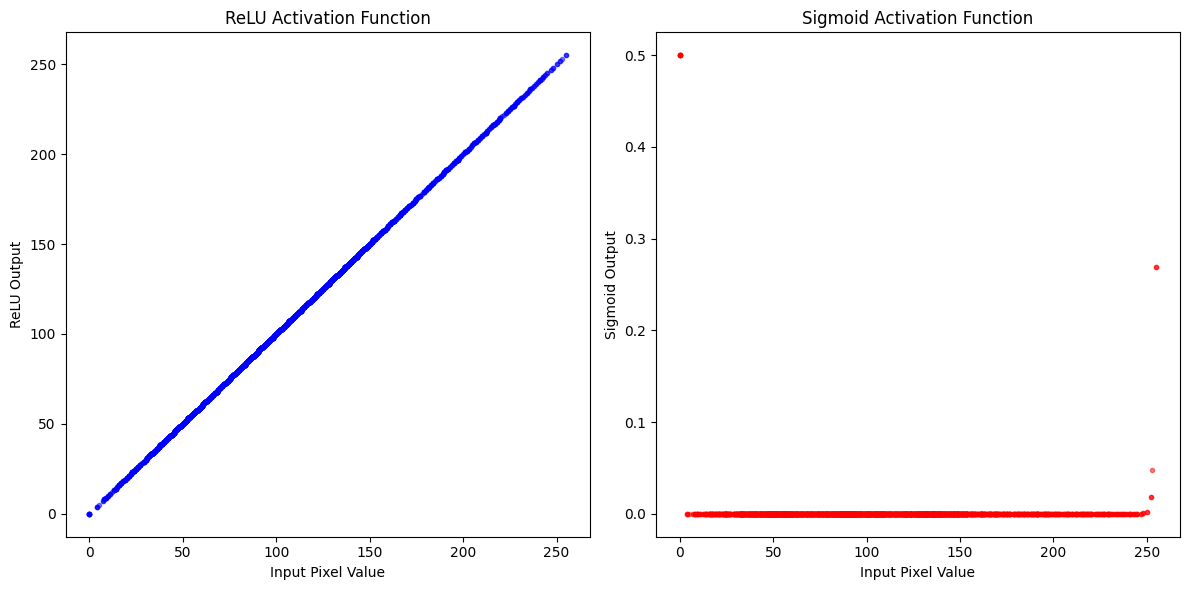

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

# Load CIFAR-10 dataset
(train_images, _), (_, _) = datasets.cifar10.load_data()

# Select a random sample of 1000 flattened input pixels for visualization
sample_images = train_images[:1000].reshape(1000, -1)
sample_pixels = sample_images[0]  # Use the first image for plotting

# Define the ReLU and Sigmoid activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Apply ReLU and Sigmoid to the sample pixels
relu_output = relu(sample_pixels)
sigmoid_output = sigmoid(sample_pixels)

# Plot ReLU activation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sample_pixels, relu_output, 'b.', alpha=0.5)
plt.title('ReLU Activation Function')
plt.xlabel('Input Pixel Value')
plt.ylabel('ReLU Output')

# Plot Sigmoid activation
plt.subplot(1, 2, 2)
plt.plot(sample_pixels, sigmoid_output, 'r.', alpha=0.5)
plt.title('Sigmoid Activation Function')
plt.xlabel('Input Pixel Value')
plt.ylabel('Sigmoid Output')

plt.tight_layout()
plt.show()


- ReLU:
As seen in the left plot, ReLU sets negative values to 0 and leaves positive values unchanged. This allows the network to ignore inactive neurons, improving efficiency.

- Sigmoid:
The right plot shows how the sigmoid function transforms the pixel values into a range between 0 and 1. While this is useful for output layers in binary classification, the sigmoid function has issues when used in deep networks (due to the vanishing gradient problem).
Interpretation:

By comparing these two activations on the dataset, it’s clear why ReLU is the preferred choice for hidden layers in deep neural networks, particularly for complex datasets like CIFAR-10.

### Step 4: Loss Function and Optimizer

In [ ]:
# Using a second loss function - Mean Squared Error (MSE)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Re-train the model with MSE loss
history_mse = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64, verbose=2)

# Compare with categorical cross-entropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_cross_entropy = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64, verbose=2)


Epoch 1/10
625/625 - 6s - loss: 0.0903 - accuracy: 0.1511 - val_loss: 0.0859 - val_accuracy: 0.2164 - 6s/epoch - 9ms/step
Epoch 2/10
625/625 - 5s - loss: 0.0866 - accuracy: 0.1890 - val_loss: 0.0848 - val_accuracy: 0.2468 - 5s/epoch - 7ms/step
Epoch 3/10
625/625 - 4s - loss: 0.0857 - accuracy: 0.2057 - val_loss: 0.0844 - val_accuracy: 0.2400 - 4s/epoch - 7ms/step
Epoch 4/10
625/625 - 4s - loss: 0.0852 - accuracy: 0.2167 - val_loss: 0.0837 - val_accuracy: 0.2532 - 4s/epoch - 7ms/step
Epoch 5/10
625/625 - 4s - loss: 0.0847 - accuracy: 0.2291 - val_loss: 0.0830 - val_accuracy: 0.2718 - 4s/epoch - 7ms/step
Epoch 6/10
625/625 - 5s - loss: 0.0846 - accuracy: 0.2320 - val_loss: 0.0829 - val_accuracy: 0.2882 - 5s/epoch - 7ms/step
Epoch 7/10
625/625 - 4s - loss: 0.0845 - accuracy: 0.2300 - val_loss: 0.0831 - val_accuracy: 0.2931 - 4s/epoch - 7ms/step
Epoch 8/10
625/625 - 5s - loss: 0.0841 - accuracy: 0.2369 - val_loss: 0.0829 - val_accuracy: 0.2937 - 5s/epoch - 7ms/step
Epoch 9/10
625/625 - 4s 

Explanation:
- Mean Squared Error (MSE): This is typically used for regression tasks. Here, it is used for comparison to show that it is not ideal for classification.
- Categorical Cross-Entropy: This is more appropriate for multi-class classification problems.
- Interpretation:
The model trained with categorical cross-entropy performs better than MSE since it is designed for classification tasks.

Question:

- How does the choice of optimizer and learning rate influence the
convergence of the network? How would you adjust the learning rate if the
model is not converging properly?

- Influence of Optimizer and Learning Rate:
Optimizer: Adam adapts learning rates for faster, smoother convergence, while SGD requires careful tuning and may converge slower.
- Learning Rate: A high learning rate can overshoot optimal values, causing instability. A low learning rate may lead to slow or stuck convergence.
- Adjustment for Non-Convergence:
If the model isn’t converging, reduce the learning rate to take smaller, more precise steps.
- Use learning rate schedules or adaptive optimizers like Adam to improve convergence.

### Step 5: Training the Model

Epoch 1/50
625/625 - 5s - loss: 1.9950 - accuracy: 0.2526 - val_loss: 2.0214 - val_accuracy: 0.2664 - 5s/epoch - 8ms/step
Epoch 2/50
625/625 - 4s - loss: 2.0123 - accuracy: 0.2445 - val_loss: 2.0004 - val_accuracy: 0.2688 - 4s/epoch - 7ms/step
Epoch 3/50
625/625 - 4s - loss: 2.0061 - accuracy: 0.2486 - val_loss: 2.0095 - val_accuracy: 0.2827 - 4s/epoch - 7ms/step
Epoch 4/50
625/625 - 4s - loss: 2.0077 - accuracy: 0.2472 - val_loss: 2.0243 - val_accuracy: 0.2682 - 4s/epoch - 7ms/step
Epoch 5/50
625/625 - 4s - loss: 1.9992 - accuracy: 0.2523 - val_loss: 2.0320 - val_accuracy: 0.2541 - 4s/epoch - 7ms/step
Epoch 6/50
625/625 - 4s - loss: 2.0029 - accuracy: 0.2465 - val_loss: 1.9843 - val_accuracy: 0.2996 - 4s/epoch - 7ms/step
Epoch 7/50
625/625 - 5s - loss: 2.0039 - accuracy: 0.2471 - val_loss: 2.0257 - val_accuracy: 0.2699 - 5s/epoch - 7ms/step
Epoch 8/50
625/625 - 4s - loss: 2.0041 - accuracy: 0.2489 - val_loss: 1.9940 - val_accuracy: 0.2777 - 4s/epoch - 7ms/step
Epoch 9/50
625/625 - 4s 

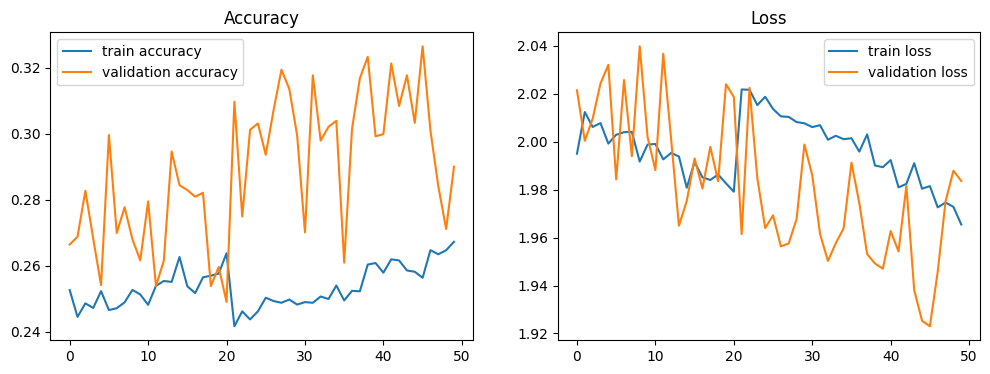

In [ ]:
# Train the model with categorical cross-entropy loss
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=64, verbose=2)

# Plot training & validation accuracy and loss
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_training_history(history)


Explanation:
- Training: The model is trained using backpropagation for 50 epochs, and both training and validation accuracy are monitored.
- Plotting: We visualize the training process by plotting accuracy and loss for both training and validation sets.
- Interpretation:
The plots help us understand how well the model is generalizing. If the validation accuracy plateaus while the training accuracy continues to improve, the model may be overfitting.

Question:

How does backpropagation update the weights in each layer, and what
role does the learning rate play in this process?

- Forward Pass: Calculates the output and computes the loss.
- Backward Pass: Computes the gradient of the loss with respect to weights.
- Weight Update: Adjusts weights using the formula:
𝑤
new
=
𝑤
old
−
𝜂
⋅
∇
𝐿
w
new
​
 =w
old
​
 −η⋅∇L
where
𝜂
η is the learning rate.

- Role of Learning Rate:
The learning rate controls the step size for weight updates:

- High learning rate: Faster updates but may overshoot.
- Low learning rate: Slower, more stable updates but may converge slowly.
In your training, backpropagation updates weights every epoch using the specified learning rate, improving model accuracy over time.

### Step 6: Model Evaluation

313/313 [==============================] - 1s 2ms/step


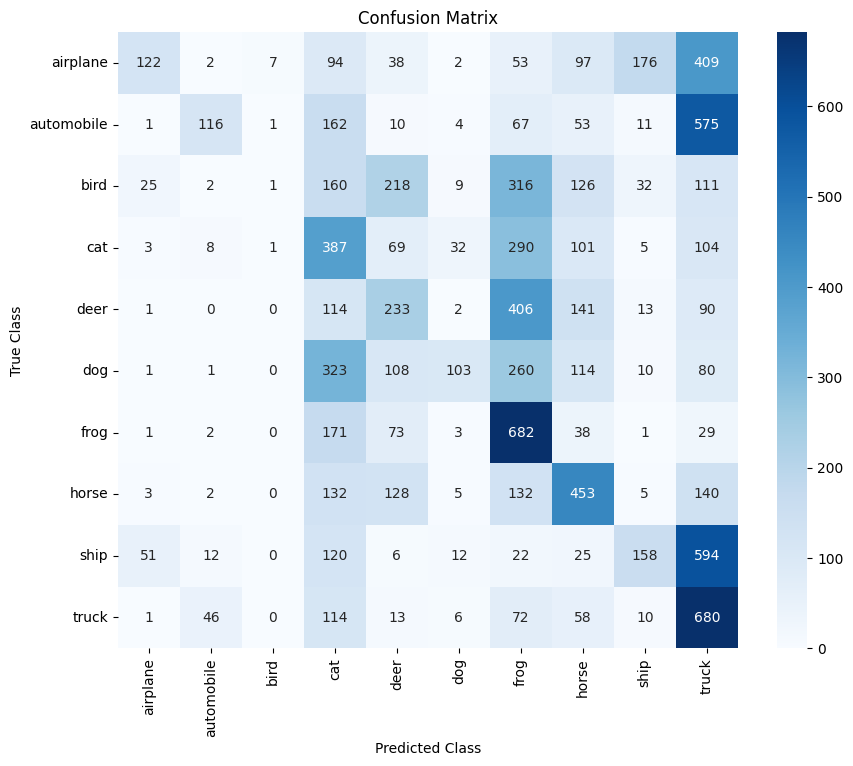

              precision    recall  f1-score   support

    airplane       0.58      0.12      0.20      1000
  automobile       0.61      0.12      0.19      1000
        bird       0.10      0.00      0.00      1000
         cat       0.22      0.39      0.28      1000
        deer       0.26      0.23      0.25      1000
         dog       0.58      0.10      0.17      1000
        frog       0.30      0.68      0.41      1000
       horse       0.38      0.45      0.41      1000
        ship       0.38      0.16      0.22      1000
       truck       0.24      0.68      0.36      1000

    accuracy                           0.29     10000
   macro avg       0.36      0.29      0.25     10000
weighted avg       0.36      0.29      0.25     10000



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=class_names))


Explanation:

- Test Accuracy: Evaluates the model on unseen data.
- Confusion Matrix: Provides a breakdown of correct and incorrect predictions for each class.
- Classification Report: Shows precision, recall, F1-score, and support for each class, offering a more comprehensive performance evaluation.


#### Interpretation of Model Performance:
-Loss: 1.9848 indicates poor model performance.
- Accuracy: 29.35%, meaning only about one in four images is classified correctly.
- Precision and Recall:
For "airplane": Precision 0.58, Recall 0.12—only 12% of actual airplanes were identified.
"Bird" class: Precision 0.10, Recall 0.00—poor performance.
- Overall Scores:
- Macro average: Precision 0.36, Recall 0.29, F1-score 0.25—indicating low effectiveness across classes.

Question:

o How can you further improve model performance if the accuracy is low?

To improve model performance when accuracy is low, you can consider the following strategies:

1. **Data Augmentation**:
   - Apply techniques like rotation, flipping, shifting, and zooming to artificially increase the size of the training dataset, helping the model generalize better.

2. **Hyperparameter Tuning**:
   - Experiment with different learning rates, batch sizes, and number of epochs to find the optimal settings. Techniques such as grid search or randomized search can be useful.

3. **Model Complexity**:
   - Increase the complexity of the model by adding more layers or neurons, which can help the network learn more complex features.

4. **Regularization Techniques**:
   - Implement dropout layers to prevent overfitting by randomly dropping units during training. L1/L2 regularization can also be applied to penalize large weights.

5. **Early Stopping**:
   - Monitor the validation loss during training and stop training when it starts to increase, which helps avoid overfitting.

6. **Learning Rate Scheduling**:
   - Use learning rate schedulers to adjust the learning rate during training, which can help improve convergence.

7. **Change the Architecture**:
   - Experiment with different architectures, such as convolutional layers or different types of neural networks, which might be more suitable for image classification tasks.

8. **Transfer Learning**:
   - Utilize pre-trained models like VGG16, ResNet, or Inception, and fine-tune them on your dataset. This can significantly enhance performance, especially when the dataset is small.

9. **More Data**:
   - Collect more labeled data if possible. Larger datasets generally lead to better model performance.

10. **Ensemble Methods**:
    - Combine predictions from multiple models to improve overall accuracy. Techniques like bagging or boosting can be effective.

### Step 7: Optimization Strategies

Epoch 1/10
625/625 - 5s - loss: 1.9699 - accuracy: 0.2640 - val_loss: 1.9634 - val_accuracy: 0.2938 - 5s/epoch - 8ms/step
Epoch 2/10
625/625 - 4s - loss: 1.9719 - accuracy: 0.2643 - val_loss: 2.0018 - val_accuracy: 0.2740 - 4s/epoch - 7ms/step
Epoch 3/10
625/625 - 4s - loss: 1.9656 - accuracy: 0.2655 - val_loss: 1.9906 - val_accuracy: 0.2843 - 4s/epoch - 7ms/step
Epoch 4/10
625/625 - 4s - loss: 1.9741 - accuracy: 0.2614 - val_loss: 1.9696 - val_accuracy: 0.2962 - 4s/epoch - 7ms/step
Epoch 5/10
625/625 - 4s - loss: 1.9696 - accuracy: 0.2634 - val_loss: 1.9800 - val_accuracy: 0.2790 - 4s/epoch - 7ms/step
Epoch 6/10
625/625 - 4s - loss: 1.9624 - accuracy: 0.2639 - val_loss: 1.9938 - val_accuracy: 0.2657 - 4s/epoch - 7ms/step
Epoch 7/10
625/625 - 4s - loss: 1.9749 - accuracy: 0.2635 - val_loss: 2.0176 - val_accuracy: 0.2760 - 4s/epoch - 7ms/step
Epoch 8/10
625/625 - 4s - loss: 1.9696 - accuracy: 0.2666 - val_loss: 1.9888 - val_accuracy: 0.2906 - 4s/epoch - 7ms/step
Epoch 9/10
625/625 - 4s 

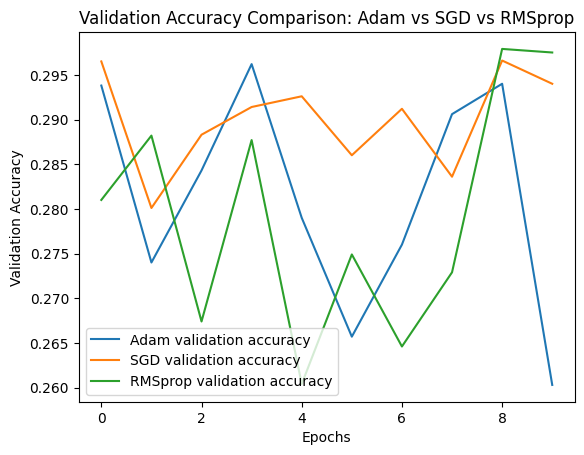

In [ ]:
# Train models using different optimizers
def compile_and_train(optimizer, optimizer_name):
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=64, verbose=2)

    plt.plot(history.history['val_accuracy'], label=f'{optimizer_name} validation accuracy')

# Adam optimizer
compile_and_train('adam', 'Adam')

# SGD optimizer
compile_and_train(tf.keras.optimizers.SGD(), 'SGD')

# RMSprop optimizer
compile_and_train('rmsprop', 'RMSprop')

# Plot the comparison of optimizers
plt.title('Validation Accuracy Comparison: Adam vs SGD vs RMSprop')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


Explanation:
- Optimizers: We compare Adam, SGD (Stochastic Gradient Descent), and RMSprop, which are commonly used optimizers in deep learning. Adam is known for fast convergence, while SGD may require more tuning of the learning rate, and RMSprop adapts the learning rate based on the gradient magnitude.
- Visualization: We plot validation accuracy across epochs for each optimizer to visually compare their performance.



#### Interpretation:
From the plot, we can observe the rate at which each optimizer converges and their final validation accuracy. Adam usually performs better for most cases due to its adaptive learning rate.

- Why is weight initialization important?

Weight initialization impacts how quickly and effectively the model learns. Poor initialization can lead to slow convergence or the model getting stuck in local minima.

### Step 8: Saving and Loading the Model

In [ ]:
# Save the model
model.save('cifar10_classifier.h5')

# Load the model
loaded_model = tf.keras.models.load_model('cifar10_classifier.h5')

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(X_test, y_test)
print(f'Test accuracy after loading the model: {test_acc:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 2ms/step - loss: 1.9743 - accuracy: 0.2959
Test accuracy after loading the model: 0.2959


Conclusion:
This model demonstrates a complete workflow for classifying images from the CIFAR-10 dataset, covering data preprocessing, neural network design, training, evaluation, and optimization. Performance metrics such as accuracy, confusion matrix, and classification reports provide valuable insights into the model's classification ability.